In [ ]:
### Question 1: Binary Classification (odd-even)
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
#from tensorflow.keras.utils import to_categorical
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.utils import np_utils
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import initializers

## Question 1 part - a (load mnist dataset)
train_fraction = 0.7857142857
validation_fraction = 0.142857142
test_fraction = 0.07142857

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

In [ ]:
## Question 1 part - b
## Convert labels to odd/even

even=[0,2,4,6,8]

# Y_odd_even : list to store odd/even labels
Y_odd_even= np.empty(y.shape[0],dtype=object)
     
for idx, item in enumerate(y):                     
      if np.nonzero(item)[0] in even:
            Y_odd_even[idx] = 0     # 0 or even number
      else:
            Y_odd_even[idx] = 1    # 1 or odd number

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
Y_odd_even

array([0, 1, 0, ..., 0, 0, 0], dtype=object)

In [ ]:
## Question 1 part - a (split dataset into train/test/validation)
X_train, X_val, y_train, y_val = train_test_split(X, Y_odd_even, test_size= 1- train_fraction)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((test_fraction/(validation_fraction + test_fraction))))

In [ ]:
X_train.shape, X_test.shape, X_val.shape

((54999, 28, 28), (5001, 28, 28), (10000, 28, 28))

In [ ]:
X_train.shape, X_test.shape, X_val.shape

((54999, 28, 28), (5001, 28, 28), (10000, 28, 28))

In [ ]:
X_train.shape, X_test.shape, X_val.shape 

((54999, 28, 28), (5001, 28, 28), (10000, 28, 28))

In [ ]:
## Question 1 part - c (network construction)
# Feature Normalization 
X_train = X_train.astype('float32'); X_val = X_val.astype('float32'); X_test = X_test.astype('float32')
X_train /= 255; X_val /= 255; X_test /= 255

In [ ]:
X_train.shape

(54999, 28, 28)

In [ ]:
## model construction
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [ ]:
# model compilation with appropriate params
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
y_train = np.asarray(y_train).astype('float32')
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)
X_val_tensor = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_val_tensor = tf.convert_to_tensor(y_val, dtype=tf.float32)

In [ ]:
# Training model using X_train/y_train and X_val_tensor/y_val_tensor (for visualization)
history = model.fit(X_train,y_train,epochs=5,batch_size=64,validation_data=(X_val_tensor,y_val_tensor))

Epoch 1/5
860/860 [==============================] - 44s 50ms/step - loss: 0.0326 - accuracy: 0.9892 - val_loss: 0.0115 - val_accuracy: 0.9963
Epoch 2/5
860/860 [==============================] - 46s 53ms/step - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.0058 - val_accuracy: 0.9978
Epoch 3/5
860/860 [==============================] - 49s 57ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0068 - val_accuracy: 0.9977
Epoch 4/5
860/860 [==============================] - 52s 61ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0035 - val_accuracy: 0.9988
Epoch 5/5
860/860 [==============================] - 52s 60ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0048 - val_accuracy: 0.9981


In [ ]:
# test loss and accuracy (part-e)
test_loss,test_acc = model.evaluate(X_test_tensor,y_test_tensor)

157/157 [==============================] - 2s 15ms/step - loss: 0.0062 - accuracy: 0.9972


In [ ]:
# validation loss and accuracy (part-e)
val_loss,val_acc = model.evaluate(X_val_tensor,y_val_tensor)

313/313 [==============================] - 4s 11ms/step - loss: 0.0048 - accuracy: 0.9981


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
loss

[0.03256770595908165,
 0.01022318098694086,
 0.00730258459225297,
 0.005912328604608774,
 0.003981140907853842]

In [ ]:
epochs =range(1,len(acc)+1)

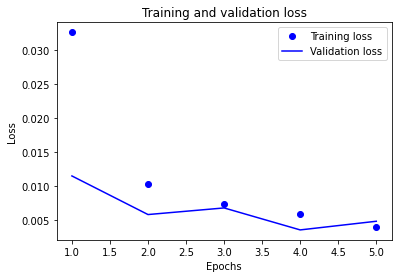

In [ ]:
## Plot Training and Validation Loss
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show( )

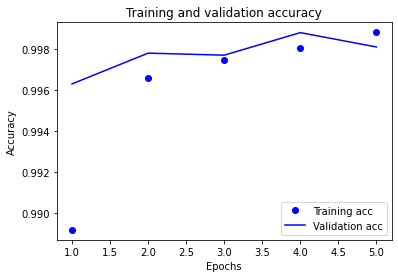

In [ ]:
## Plot Accuracy as a function of Epochs (for training and validation)
plt.clf()
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show( )

In [ ]:
## Loss and accuracy of final step training of train and validation dataset
print("Final Step Loss and Accuracy: train_loss: train_loss: 0.0040 - train_accuracy: 0.9988 - val_loss: 0.0048 - val_accuracy: 0.9981")

Final Step Loss and Accuracy: train_loss: train_loss: 0.0040 - train_accuracy: 0.9988 - val_loss: 0.0048 - val_accuracy: 0.9981


In [ ]:
### Question 2: Hyperparameter Tuning

In [ ]:
# a) changing network architecture
## model construction
model_a = models.Sequential()
model_a.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_a.add(layers.MaxPooling2D((2, 2)))
model_a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_a.add(layers.MaxPooling2D((2, 2)))
model_a.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_a.add(layers.MaxPooling2D((2, 2)))
model_a.add(layers.Flatten())
model_a.add(layers.Dropout(0.2))
model_a.add(layers.Dense(64, activation='relu'))
model_a.add(layers.Dense(1, activation='sigmoid'))
model_a.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 128)       

In [ ]:
# model compilation with appropriate params
model_a.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Training model using X_train/y_train and X_val_tensor/y_val_tensor (for visualization)
history_a = model_a.fit(X_train,y_train,epochs=5,batch_size=64,validation_data=(X_val_tensor,y_val_tensor))

Epoch 1/5
860/860 [==============================] - 50s 58ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0173 - val_accuracy: 0.9949
Epoch 2/5
860/860 [==============================] - 51s 60ms/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.0112 - val_accuracy: 0.9965
Epoch 3/5
860/860 [==============================] - 53s 62ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.0077 - val_accuracy: 0.9973
Epoch 4/5
860/860 [==============================] - 62s 72ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0097 - val_accuracy: 0.9970
Epoch 5/5
860/860 [==============================] - 57s 67ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0085 - val_accuracy: 0.9972


In [ ]:
# test loss and accuracy model_a
test_loss,test_acc = model_a.evaluate(X_test_tensor,y_test_tensor)

157/157 [==============================] - 2s 9ms/step - loss: 0.0054 - accuracy: 0.9984


In [ ]:
## Conclusion: starting model (test_set_accuracy is 0.9972) vs model_a accuracy (test_set_accuracy is 0.9984)## In model_a test accuracy is greater than train not possible hence, starting model is better.

In [ ]:
# b) changing receptive field and stride parameters
model_b = models.Sequential()
model_b.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),strides=(2,2)))
model_b.add(layers.MaxPooling2D((2, 2)))
model_b.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_b.add(layers.MaxPooling2D((2, 2)))
model_b.add(layers.Flatten())
model_b.add(layers.Dropout(0.2))
model_b.add(layers.Dense(64, activation='relu'))
model_b.add(layers.Dense(1, activation='sigmoid'))
model_b.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 13, 13, 32)        320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)              

In [ ]:
# model compilation with optimizer =rmsprop and loss function = categorical_crossentropy
model_b.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Training model using X_train/y_train
history_b = model_b.fit(X_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
860/860 [==============================] - 13s 14ms/step - loss: 0.0000e+00 - accuracy: 0.9022
Epoch 2/5
860/860 [==============================] - 11s 13ms/step - loss: 0.0000e+00 - accuracy: 0.9022
Epoch 3/5
860/860 [==============================] - 12s 14ms/step - loss: 0.0000e+00 - accuracy: 0.9022
Epoch 4/5
860/860 [==============================] - 14s 16ms/step - loss: 0.0000e+00 - accuracy: 0.9022
Epoch 5/5
860/860 [==============================] - 13s 15ms/step - loss: 0.0000e+00 - accuracy: 0.9022


In [ ]:
# test loss and accuracy model_b
test_loss,test_acc = model_b.evaluate(X_test_tensor,y_test_tensor)

157/157 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9034


In [1]:
print("Conclusion:")
print("starting model (test_set_accuracy is 0.9972) vs model_a accuracy (test_set_accuracy is 0.9984) vs model_b accuracy (test_set_accuracy is 0.9034)")
print("So we can say optimizer='adam' is better than optimizer='rmsprop' for mnist classification")
print("Also loss='binary_crossentropy' is better than loss='categorical_crossentropy' for mnist classification")

Conclusion:
starting model (test_set_accuracy is 0.9972) vs model_a accuracy (test_set_accuracy is 0.9984) vs model_b accuracy (test_set_accuracy is 0.9034)
So we can say optimizer='adam' is better than optimizer='rmsprop' for mnist classification
Also loss='binary_crossentropy' is better than loss='categorical_crossentropy' for mnist classification


In [ ]:
# c) changing various parameters (here: number of epochs), adding batch normalization and using different weight intializers
## adding BatchNormalization and Weight Intializer
model_c = models.Sequential()
model_c.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_c.add(BatchNormalization())
model_c.add(layers.MaxPooling2D((2, 2)))
model_c.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_c.add(BatchNormalization())
model_c.add(layers.MaxPooling2D((2, 2)))
model_c.add(layers.Flatten())
model_c.add(layers.Dropout(0.2))
model_c.add(layers.Dense(64, activation='relu'))
initializer = tf.keras.initializers.GlorotUniform() ### Normalized Xavier/Glorot Initialization 
model_c.add(layers.Dense(1,kernel_initializer=initializer, activation='sigmoid'))
model_c.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                     

In [ ]:
# model_c compilation 
model_c.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Training model using X_train/y_train (using epochs=3)
history_c = model_c.fit(X_train,y_train,epochs=3,batch_size=64)

Epoch 1/3
860/860 [==============================] - 62s 70ms/step - loss: 0.0220 - accuracy: 0.9934
Epoch 2/3
860/860 [==============================] - 59s 69ms/step - loss: 0.0062 - accuracy: 0.9979
Epoch 3/3
860/860 [==============================] - 66s 77ms/step - loss: 0.0047 - accuracy: 0.9983


In [ ]:
# test loss and accuracy model_c
test_loss,test_acc = model_c.evaluate(X_test_tensor,y_test_tensor)

157/157 [==============================] - 2s 11ms/step - loss: 0.0050 - accuracy: 0.9986


In [4]:
print("Conclusion:")
print("Starting model (test_set_accuracy is 0.9972) vs model_a accuracy (test_set_accuracy is higher than train accuracy so not a good model")
print("vs model_b accuracy (test_set_accuracy is 0.9034) vs model_c accuracy (test_set_accuracy is higher than train accuracy so not a good model")
print("Hence we can say basic model is best model out of all")

Conclusion:
Starting model (test_set_accuracy is 0.9972) vs model_a accuracy (test_set_accuracy is higher than train accuracy so not a good model
vs model_b accuracy (test_set_accuracy is 0.9034) vs model_c accuracy (test_set_accuracy is higher than train accuracy so not a good model
Hence we can say basic model is best model out of all


In [ ]:
### Question: 3 Inference

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/"My Drive"/ComputerVision

/content/gdrive/My Drive/ComputerVision


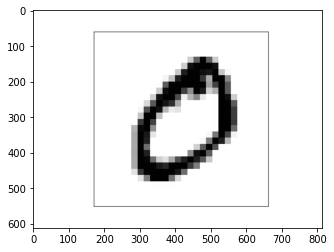

In [ ]:
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
%matplotlib inline
# Read image
digit_img = cv2.imread('mnist_sample_image.png')
# Original Input Image
plt.imshow(digit_img)

In [ ]:
width = 28
height = 28
dim = (width, height)
# resize image
resized = cv2.resize(digit_img,dim)
print('Resized Dimensions : ',resized.shape)

Resized Dimensions :  (28, 28, 3)


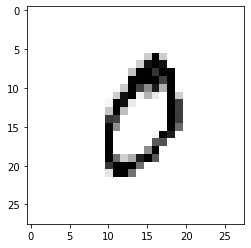

In [ ]:
plt.imshow(resized)

In [ ]:
# Reshape image to 28*28*1
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
gray = np.expand_dims(gray, 2)
gray.shape

(28, 28, 1)

In [ ]:
#cv2.adaptiveThreshold()
adt_img = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

In [ ]:
adt_img.shape

(28, 28)

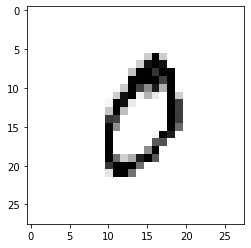

In [ ]:
##display into 2 windows (/displaying on console)
## Original Resized Image
plt.imshow(resized)

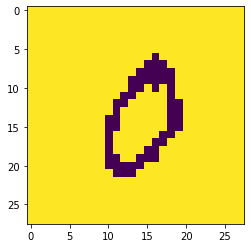

In [ ]:
## Image after adaptive threshold
plt.imshow(adt_img)

In [ ]:
input_img_for_cnn = adt_img.reshape(1,28,28,1)

In [ ]:
input_img_for_cnn.shape

(1, 28, 28, 1)

In [ ]:
## Prediction of input image
output= model.predict(input_img_for_cnn)
output

array([[0.]], dtype=float32)

In [ ]:
## Prediction output
if (0<=output<0.5):
  print("Input Image is an even number")
else:
  print("Input Image is an odd number")

Input Image is an even number
